In [1]:
import tensorflow as tf
import pathlib
from tensorflow.keras import datasets, layers, models
gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.8)
import numpy as np

In [2]:
sector = 160

label_set=np.zeros((sector*81))
for i in range(81):
    label_set[i*sector:sector*(i+1)] = i
print(label_set.shape)

(12960,)


In [3]:
print(label_set[0])
print(label_set[1])
print(label_set[9000])
print(label_set[11111])

0.0
0.0
56.0
69.0


In [4]:
from sklearn.model_selection import train_test_split
X = np.load('X_6_26_train200mpc.npy')
X = np.asarray(X, np.float32)
#X = tf.convert_to_tensor(X, np.float32)
Y = label_set

print(X.shape)
print(Y.shape)

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.1) 
#Use 10 percent of the data to validate the model

(12960, 3, 2, 11)
(12960,)


In [5]:
# construct a CNN, Keras used.
model = models.Sequential()
model.add(layers.Conv2D(11, kernel_size = 1, strides=(1, 1), padding='valid',input_shape = (3,2,11),data_format='channels_first', 
                        activation='relu'))
model.add(layers.MaxPooling2D(pool_size=1, strides=None, data_format='channels_first'))
model.add(layers.Conv2D(22, kernel_size = 1, strides=(1, 1), padding='valid',
                        activation='relu'))
model.add(layers.MaxPooling2D(pool_size=1, strides=None, data_format='channels_first'))
model.add(layers.Conv2D(44, kernel_size = 1, strides=(1, 1), padding='valid',
                        activation='relu'))
model.add(layers.Dropout(0.02, noise_shape=None, seed=None))
model.add(layers.MaxPooling2D(pool_size=1, strides=None, data_format='channels_last'))
model.add(layers.Flatten())
model.add(layers.Dense(162, activation='relu'))
model.add(layers.Dense(81, activation='softmax'))
#model.add(layers.Dense(9, activation='softmax'))

In [6]:
#optimizer is Adam, default hyperparameter used. And the CNN architecture can be seen.
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
    loss='sparse_categorical_crossentropy',
    metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 11, 2, 11)         44        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 2, 11)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 2, 22)         264       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 2, 22)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 2, 44)         1012      
_________________________________________________________________
dropout (Dropout)            (None, 11, 2, 44)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 2, 44)         0

In [7]:
# Train the model in 50 epochs.
history = model.fit(X_train, Y_train, epochs=50, 
                    validation_data=(X_validation, Y_validation))

Train on 11664 samples, validate on 1296 samples
Epoch 1/50
11664/11664 [==============================] - 2s 211us/sample - loss: 2.8701 - accuracy: 0.2390 - val_loss: 1.5965 - val_accuracy: 0.4931
Epoch 2/50
11664/11664 [==============================] - 1s 88us/sample - loss: 1.2555 - accuracy: 0.5880 - val_loss: 1.0182 - val_accuracy: 0.6597
Epoch 3/50
11664/11664 [==============================] - 1s 87us/sample - loss: 0.8290 - accuracy: 0.7259 - val_loss: 0.6358 - val_accuracy: 0.7886
Epoch 4/50
11664/11664 [==============================] - 1s 95us/sample - loss: 0.6245 - accuracy: 0.7892 - val_loss: 0.5690 - val_accuracy: 0.8063
Epoch 5/50
11664/11664 [==============================] - 1s 104us/sample - loss: 0.4949 - accuracy: 0.8283 - val_loss: 0.4560 - val_accuracy: 0.8557
Epoch 6/50
11664/11664 [==============================] - 1s 93us/sample - loss: 0.4196 - accuracy: 0.8544 - val_loss: 0.4193 - val_accuracy: 0.8565
Epoch 7/50
11664/11664 [==============================]

In [8]:
# Save the model as a h5 file, accessable when testing.
model.save('CNN_6_26_200mpc.h5')

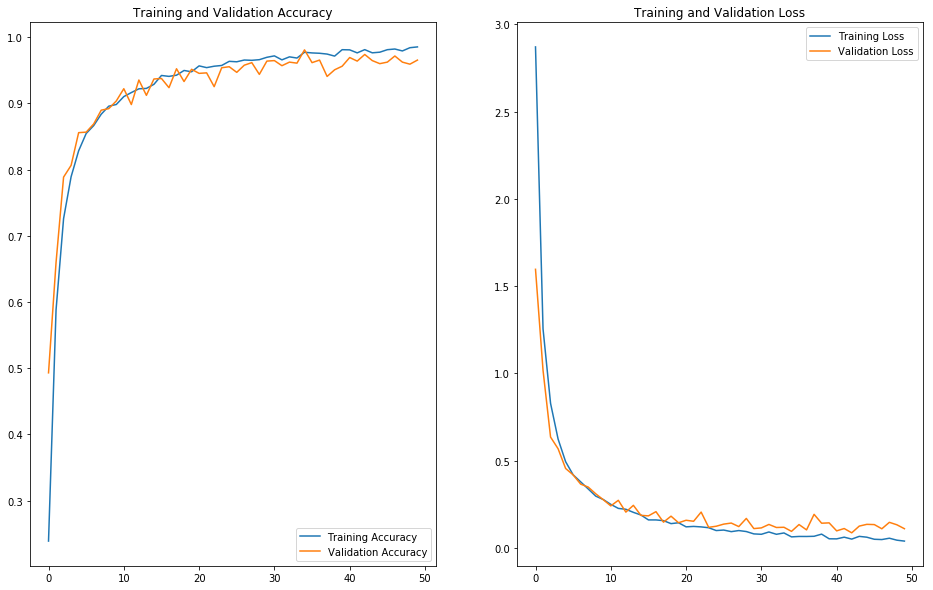

In [10]:
import matplotlib.pyplot as plt
#visualize the train&validation process
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(16, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
